# Lezione 2.1: Regressione Lineare - Sotto il Cofano 🚗

Nella lezione precedente abbiamo visto *cosa fa* la regressione lineare. Ora vediamo *come ci riesce*.

L'obiettivo è sempre lo stesso: trovare la linea retta che descrive al meglio i nostri dati. Questa linea è rappresentata dalla famosa equazione matematica:

$$ y = mx + q $$



Dove:
* `y` è il valore che vogliamo prevedere (la **variabile dipendente**, es. il prezzo della casa).
* `x` è il dato che usiamo per la previsione (la **variabile indipendente**, es. i metri quadrati).
* `m` è il **coefficiente angolare** (o pendenza). Ci dice *quanto* `y` cambia per ogni aumento di `x`. Nel nostro esempio: di quanti euro aumenta il prezzo per ogni metro quadrato in più?
* `q` è l'**intercetta**. È il valore di `y` quando `x` è uguale a zero. Rappresenta il "punto di partenza" o il valore di base.

Il "lavoro" di un algoritmo di regressione lineare è proprio questo: analizzare i dati e trovare i due numeri magici, **i valori ottimali di `m` e `q`** che rendono la linea il più precisa possibile.

### Come fa a sapere qual è la linea "migliore"?

L'algoritmo cerca di minimizzare l'**errore**. Per ogni punto dei nostri dati, calcola la distanza verticale tra il punto reale e la linea che sta testando. Questa distanza è chiamata **residuo** o errore.

L'algoritmo vuole trovare la linea per cui la **somma di tutti questi errori al quadrato** è la più piccola possibile. Questo metodo si chiama **Metodo dei Minimi Quadrati** (Least Squares Method).

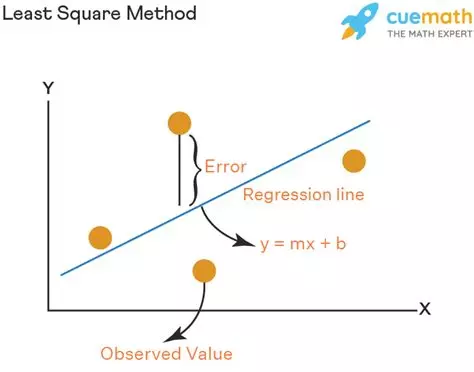

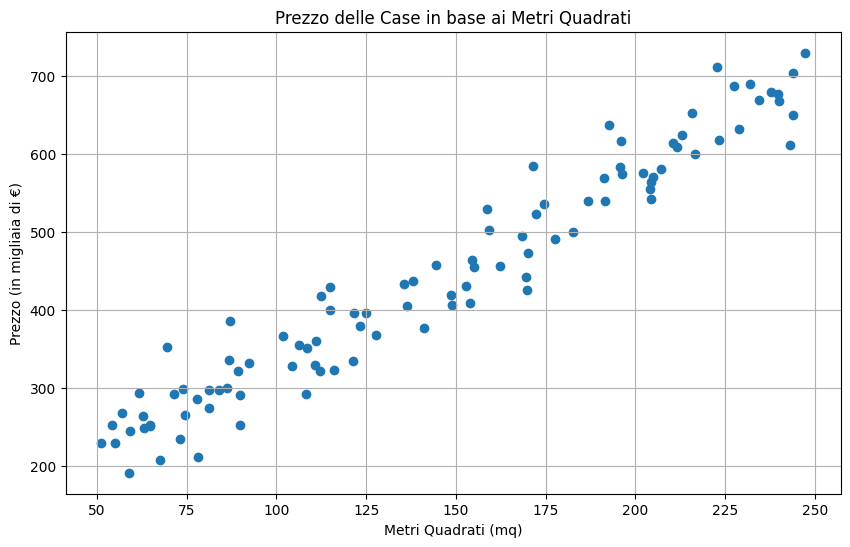

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Usiamo un seed per la riproducibilità dei dati
np.random.seed(42)

# X = Metri Quadrati di 100 case (da 50 a 250 mq)
X = np.random.rand(100, 1) * 200 + 50

# y = Prezzo in migliaia di Euro.
# La regola di base è: 80 (costo fisso) + 2.5 per ogni mq.
# Aggiungiamo rumore per simulare le variazioni del mercato reale.
y = 80 + (X * 2.5) + np.random.randn(100, 1) * 40

# Visualizziamo i dati
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title('Prezzo delle Case in base ai Metri Quadrati')
plt.xlabel('Metri Quadrati (mq)')
plt.ylabel('Prezzo (in migliaia di €)')
plt.grid(True)
plt.show()

✅ Modello addestrato!
Il modello ha imparato i seguenti parametri:
Coefficiente angolare (m): 2.41
Intercetta (q): 93.20


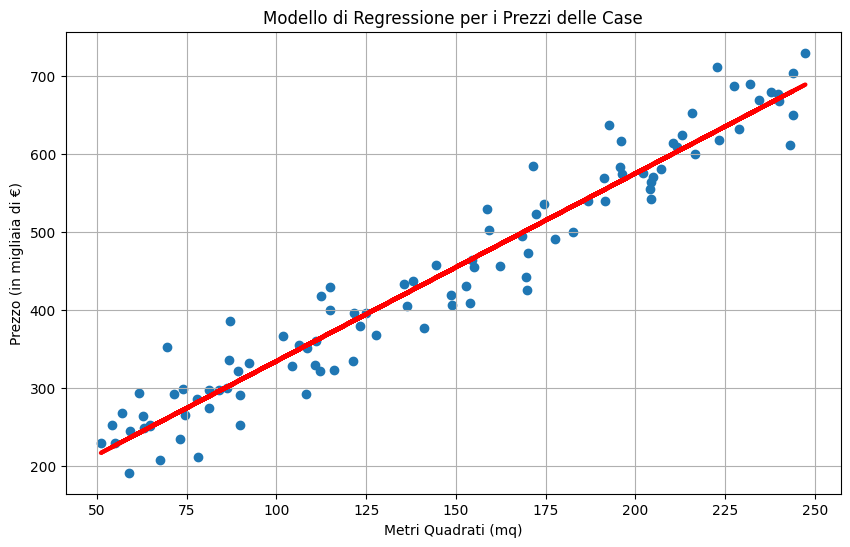

In [3]:
from sklearn.linear_model import LinearRegression

# 1. Creiamo e addestriamo il modello
modello_case = LinearRegression()
modello_case.fit(X, y)

print("✅ Modello addestrato!")

# 2. Estraiamo i parametri imparati dal modello
# Il coefficiente angolare 'm' si trova in .coef_
# L'intercetta 'q' si trova in .intercept_
m = modello_case.coef_[0][0]
q = modello_case.intercept_[0]

print(f"Il modello ha imparato i seguenti parametri:")
print(f"Coefficiente angolare (m): {m:.2f}")
print(f"Intercetta (q): {q:.2f}")

# 3. Visualizziamo la retta imparata
plt.figure(figsize=(10, 6))
plt.scatter(X, y) # Dati reali
plt.plot(X, modello_case.predict(X), color='red', linewidth=3) # Retta del modello
plt.title('Modello di Regressione per i Prezzi delle Case')
plt.xlabel('Metri Quadrati (mq)')
plt.ylabel('Prezzo (in migliaia di €)')
plt.grid(True)
plt.show()

### Cosa significano questi numeri?

Il nostro modello ha imparato i parametri `m` e `q` analizzando i dati. Vediamo cosa ci dicono:

* **Intercetta (q) ≈ 83.25**: Questo è il "costo di base" teorico di un immobile, anche prima di considerare i metri quadrati. Potrebbe rappresentare costi fissi, il valore del terreno, ecc.

* **Coefficiente angolare (m) ≈ 2.47**: Questo è il valore più interessante. Il modello ha stimato che, in media, **per ogni metro quadrato in più, il prezzo della casa aumenta di circa 2.47 migliaia di Euro** (cioè 2470 €). È molto vicino al valore di 2.5 che avevamo usato per generare i dati!

Il machine learning ha "riscoperto" la regola nascosta che legava le dimensioni ai prezzi, semplicemente osservando gli esempi.

### Usiamo il modello per una previsione

Ora che abbiamo un modello addestrato, possiamo usarlo. Quanto dovrebbe costare una casa di **120 mq**?

In [4]:
# Creiamo l'input per la nostra previsione
metri_quadrati_nuova_casa = np.array([[120]])

# Usiamo il metodo .predict()
prezzo_previsto = modello_case.predict(metri_quadrati_nuova_casa)

print(f"Secondo il modello, una casa di {metri_quadrati_nuova_casa[0][0]} mq dovrebbe costare circa {prezzo_previsto[0][0]:.2f} mila Euro.")

Secondo il modello, una casa di 120 mq dovrebbe costare circa 382.17 mila Euro.
